In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

from mpl_toolkits.basemap import Basemap

import seaborn as sns

# Is Global Warming real and who is to blame for it?

### Author: Daniel Petrov

## Abstract

The signs of global warming are everywhere, and are more complex than just climbing temperatures. In following project I will explore data regarding global temperatures, $CO_2$ concentration and annual emission in Earth's atmosphere in the last 200 years. I will try to find how strong is the connection between Earth's temperature, $CO_2$ levels and different human activities that increase $CO_2$ in atmosphere. 

## Introduction

Carbon dioxide (CO2) is known as a greenhouse gas (GHG)—a gas that absorbs and emits thermal radiation, creating the 'greenhouse effect'. Along with other greenhouse gases, such as nitrous oxide and methane, CO2 is important in sustaining a habitable temperature for the planet: if there were absolutely no GHGs, our planet would simply be too cold. It has been estimated that without these gases, the average surface temperature of the Earth would be about -18 degrees celsius.1

Since the Industrial Revolution, however, energy-driven consumption of fossil fuels has led to a rapid increase in CO2 emissions, disrupting the global carbon cycle and leading to a planetary warming impact. Global warming and a changing climate have a range of potential ecological, physical and health impacts, including extreme weather events. In light of this evidence, UN member parties have set a target of limiting average warming to 2 degrees celsius above pre-industrial temperatures.

###  Global land and ocean temperatures.
Information for dataset from university Berkeley.
Estimated Jan 1951-Dec 1980 global mean temperature (C)
Using air temperature above sea ice:   14.179 +/- 0.046
Using water temperature below sea ice: 14.726 +/- 0.046
Using air temperature above sea ice:

Estimated Jan 1951-Dec 1980 monthly absolute temperature:
     Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
    12.29 12.50 13.12 14.04 15.02 15.73 16.00 15.83 15.24 14.31 13.29 12.55
+/-  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05

Using water temperature below sea ice:

Estimated Jan 1951-Dec 1980 monthly absolute temperature:
      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
     12.97 13.23 13.87 14.71 15.51 16.11 16.40 16.31 15.75 14.82 13.83 13.16
 +/-  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05

For each month, we have the estimated global surface temperature anomaly 
 for that month and its uncertainty.  We also report the corresponding values 
 for year, five-year, ten-year, and twenty-year moving averages CENTERED about 
 that month (rounding down if the center is in between months).  For example, 
 the annual average from January to December 1950 is reported at June 1950. 

Data columns:
                  Monthly          Annual          Five-year        Ten-year        Twenty-year
 Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
We will use only the first 4 columns.
There are 2 datasets in the link. We will use the first dataset with data for Global Average Temperature Anomaly with Sea Ice Temperature Inferred from Air Temperatures, that's why we skip last 2041 rows.

In [3]:
global_temps = pd.read_fwf("http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt", skiprows= 76, skipfooter= 2041,
                           usecols = ["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3"])

In [4]:
global_temps.iloc[np.r_[0:4, -4:0]]

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3
0           1850           1      -0.791       0.355
1           1850           2      -0.263       0.444
2           1850           3      -0.404       0.362
3           1850           4      -0.702       0.273
2030        2019           3       1.138       0.056
2031        2019           4       1.032       0.067
2032        2019           5       0.857       0.063
2033        2019           6       0.824       0.060

Let's rename columns we will use.

In [5]:
global_temps.columns = ["year", "month", "monthly_anomaly", "monthly_uncertainty"]
global_temps.iloc[np.r_[0:4, -4:0]]

year  month  monthly_anomaly  monthly_uncertainty
0     1850      1           -0.791                0.355
1     1850      2           -0.263                0.444
2     1850      3           -0.404                0.362
3     1850      4           -0.702                0.273
2030  2019      3            1.138                0.056
2031  2019      4            1.032                0.067
2032  2019      5            0.857                0.063
2033  2019      6            0.824                0.060

In [6]:
global_temps.shape

(2034, 4)

In [7]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 4 columns):
year                   2034 non-null int64
month                  2034 non-null int64
monthly_anomaly        2034 non-null float64
monthly_uncertainty    2034 non-null float64
dtypes: float64(2), int64(2)
memory usage: 63.6 KB


In [8]:
global_temps.year.unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

Data look fine and dtypes are correct. We have data for 1850 till 2019.

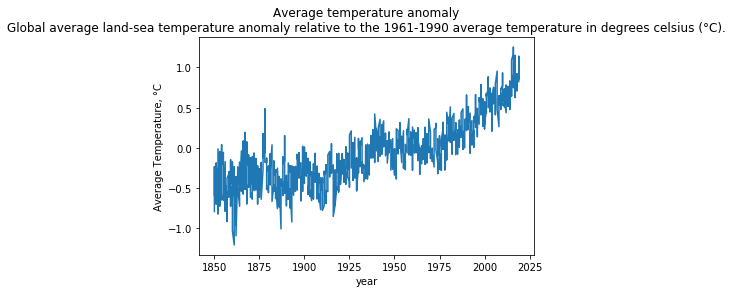

In [9]:
plt.plot(global_temps.year, global_temps.monthly_anomaly)
plt.xlabel("year")
plt.ylabel("Average Temperature, °C")
plt.title("Average temperature anomaly\nGlobal average land-sea temperature anomaly relative to the 1961-1990 average temperature in degrees celsius (°C).")
plt.show()

Above you see fairly clear how temperature is increasing. But it will be better to see trendline of that increase right. Let's do it.

In [10]:
def plot_trendline(x, y):
    plt.plot(x,y, "o")

    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x), "r-")
    plt.xlabel("year")
    plt.ylabel("temperature, $\circ$C")

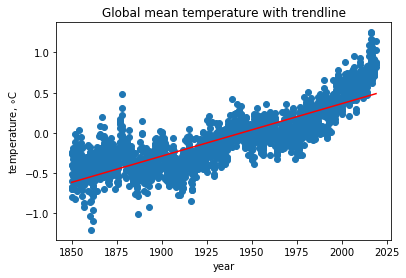

In [11]:
plot_trendline(global_temps.year, global_temps.monthly_anomaly)
plt.title("Global mean temperature with trendline")
plt.show()

Trendline speaks for itself. From 1850 till now Earth's temperature has risen by  $1.5^\circ$C. Let's check out what monthly_uncertainty shows us.

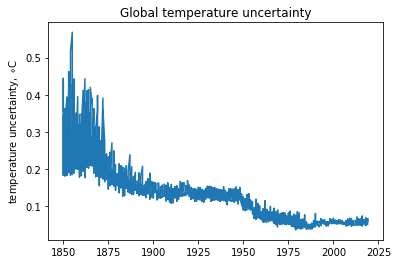

In [12]:
plt.plot(global_temps.year, global_temps.monthly_uncertainty)
plt.ylabel("temperature uncertainty, $\circ$C")
plt.title("Global temperature uncertainty")
plt.show()


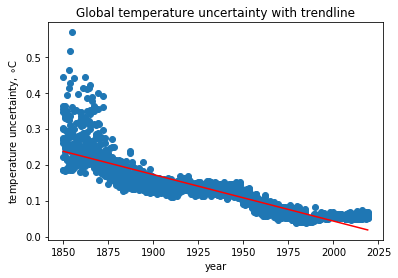

In [13]:
plot_trendline(global_temps.year, global_temps.monthly_uncertainty)
plt.ylabel("temperature uncertainty, $\circ$C")
plt.title("Global temperature uncertainty with trendline")
plt.show()

Temperature uncertainty is decreasing overtime which is great but why there is uncertainty in first place? First 150 years ago temperature measurements weren't so accurate as today and they weren't taken from so many points on Earth as today. But why even today there is uncertainty? We have month and year mean temperature. It's calculated by scientists base on model and not on direct observation, because obviously you can't measurement Earth temperature in one point on Earth. Also missing data and a poor definition of the space-time resolution. More about temperature uncertainty you can find [here](http://www.realclimate.org/index.php/archives/2017/04/what-is-the-uncertainty-in-the-earths-temperature-rise/). Let's combine mean temperature and uncertainty on one nice plot for good visualization.

In [14]:
years = np.unique(global_temps.year)
mean_temp_world = []
mean_temp_world_uncertainty = []
for year in years:
    mean_temp_world.append(global_temps[global_temps.year == year]["monthly_anomaly"].mean())
    mean_temp_world_uncertainty.append(global_temps[global_temps.year == year]["monthly_uncertainty"].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

###  CO2 emissions

Let's examine $CO_2$ concentration in Earth atmosphere now.

In [15]:
co2_concentration_long_term = pd.read_csv("data/co2-concentration-long-term.csv")

In [16]:
co2_concentration_long_term.head()

Entity      Code  Year  CO₂ concentration (parts per million)
0  World  OWID_WRL     1                                276.064
1  World  OWID_WRL     2                                276.112
2  World  OWID_WRL     3                                276.163
3  World  OWID_WRL     4                                276.218
4  World  OWID_WRL     5                                276.276

Let's drop first 2 columns, because they don't give us more data and rename last one.

In [17]:
co2_concentration_long_term = co2_concentration_long_term.drop(columns=["Entity", "Code"])
co2_concentration_long_term.columns = ["year", "co2_concentration_ppm"]

In [18]:
co2_concentration_long_term.iloc[np.r_[0:4, -4:0]]

year  co2_concentration_ppm
0        1                276.064
1        2                276.112
2        3                276.163
3        4                276.218
2014  2015                398.205
2015  2016                400.585
2016  2017                402.982
2017  2018                405.385

In [19]:
co2_concentration_long_term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 2 columns):
year                     2018 non-null int64
co2_concentration_ppm    2018 non-null float64
dtypes: float64(1), int64(1)
memory usage: 31.6 KB


In [20]:
def plot_co2_concentration(year, concentration, title):
    plt.plot(year, concentration)
    plt.xlabel("year")
    plt.ylabel("CO₂ concentration (parts per million")
    plt.title(title)
    plt.show()

We have data for year $CO_2$ concentration from year 1 to 2018.

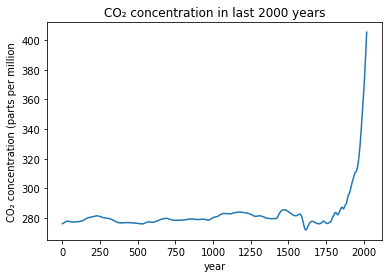

In [21]:
plot_co2_concentration(co2_concentration_long_term.year, co2_concentration_long_term.co2_concentration_ppm, "CO₂ concentration in last 2000 years")

We see that till around 1750 year concentration is fairly steady with minor ups and downs.

In [22]:
co2_concentration_long_term[co2_concentration_long_term.co2_concentration_ppm == co2_concentration_long_term.co2_concentration_ppm.min()]

year  co2_concentration_ppm
1613  1614                 271.93

Minimum $CO_2$ in last 2000 year was in 1613 and it caused mini Ice Age. More about it you can find [here](https://en.wikipedia.org/wiki/Little_Ice_Age).

In [23]:
co2_concentration_after_1850 = co2_concentration_long_term[co2_concentration_long_term.year > 1850 ]

Let's see concentration after 1850 which looks more interesting.

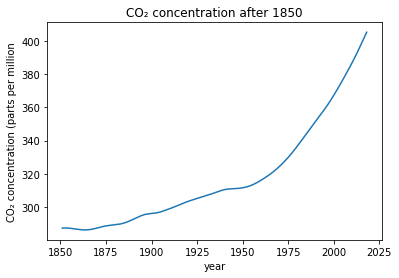

In [24]:
plot_co2_concentration(co2_concentration_after_1850.year, co2_concentration_after_1850.co2_concentration_ppm, "CO₂ concentration after 1850")

In [25]:
co2_concentration_before_1850 = co2_concentration_long_term[co2_concentration_long_term.year <= 1850 ]

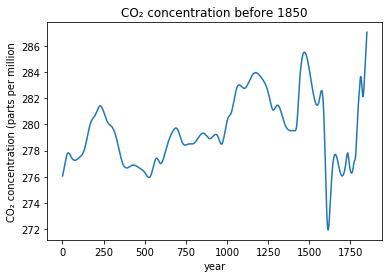

In [26]:
plot_co2_concentration(co2_concentration_before_1850.year, co2_concentration_before_1850.co2_concentration_ppm, "CO₂ concentration before 1850")

Let's compare data before and after 1850 year.

In [27]:
co2_concentration_before_1850.describe().T

count        mean         std     min       25%  \
year                   1850.0  925.500000  534.193317    1.00  463.2500   
co2_concentration_ppm  1850.0  279.559338    2.596247  271.93  277.4065   

                           50%         75%       max  
year                   925.500  1387.75000  1850.000  
co2_concentration_ppm  279.227   281.40625   287.058

In [28]:
co2_concentration_after_1850.describe().T

count         mean        std       min        25%  \
year                   168.0  1934.500000  48.641546  1851.000  1892.7500   
co2_concentration_ppm  168.0   317.655185  31.447418   286.104   293.9615   

                            50%        75%       max  
year                   1934.500  1976.2500  2018.000  
co2_concentration_ppm   308.454   331.5245   405.385

First std before 1850 is 2.6 ppm and after 1850 is 31.4 ppm. Basically all values are increased after 1850.

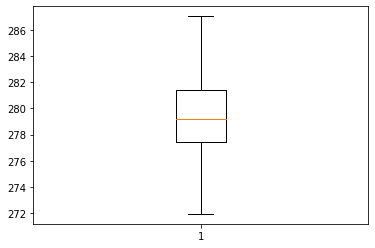

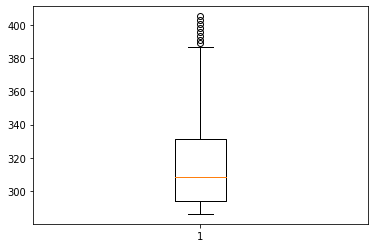

In [29]:
plt.boxplot(co2_concentration_before_1850.co2_concentration_ppm)
plt.show()
plt.boxplot(co2_concentration_after_1850.co2_concentration_ppm)
plt.show()

Also graphically you see how before 1850 distribution of $CO_2$ looks normal. After that values are increasing so much over time that they look like outliers. Too bad for us they are not outliers.

Well so far that doesn't look good. In case you are still sceptical see $CO_2$ concentration in last 800000 years:
![](https://nca2009.globalchange.gov/sites/default/files/1-Global-pg-13_1.jpg)

If this doesn't convince you, I don't know what will. But I will try. I have more data that may change your mind.

##  Factors that increase $CO_2$ in atmosphere. 
Let's explore some different datasets with different features that contribute to $CO_2$ increase. In the end we will try to combine them all in one dataset.

In [30]:
annual_co2_by_country = pd.read_csv("data/annual-co2-emissions-per-country.csv")

In [31]:
annual_co2_by_country.head()

Entity Code  Year  Annual CO₂ emissions (tonnes)
0  Afghanistan  AFG  1949                        14656.0
1  Afghanistan  AFG  1950                        84272.0
2  Afghanistan  AFG  1951                        91600.0
3  Afghanistan  AFG  1952                        91600.0
4  Afghanistan  AFG  1953                       106256.0

In [32]:
annual_co2_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20858 entries, 0 to 20857
Data columns (total 4 columns):
Entity                           20858 non-null object
Code                             18651 non-null object
Year                             20858 non-null int64
Annual CO₂ emissions (tonnes)    20858 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.9+ KB


In [33]:
annual_co2_by_country.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'D

We have data for World so let's use it.

In [34]:
annual_co2_world = annual_co2_by_country[annual_co2_by_country.Entity == "World"].reset_index(drop=True)

In [35]:
annual_co2_world.head()

Entity      Code  Year  Annual CO₂ emissions (tonnes)
0  World  OWID_WRL  1751                      9350528.0
1  World  OWID_WRL  1752                      9354192.0
2  World  OWID_WRL  1753                      9354192.0
3  World  OWID_WRL  1754                      9357856.0
4  World  OWID_WRL  1755                      9361520.0

In [36]:
annual_co2_world = annual_co2_world.drop(columns=["Entity", "Code"])

In [37]:
annual_co2_world.columns = ["year", "annual_co2_emis"]

In [38]:
annual_co2_world.iloc[np.r_[0:4, -4:0]]

year  annual_co2_emis
0    1751     9.350528e+06
1    1752     9.354192e+06
2    1753     9.354192e+06
3    1754     9.357856e+06
263  2014     3.550583e+10
264  2015     3.546275e+10
265  2016     3.567510e+10
266  2017     3.615326e+10

Let's make emission in billions of tonnes.

In [39]:
annual_co2_world.annual_co2_emis = annual_co2_world.annual_co2_emis / 10e8

In [40]:
annual_co2_world.iloc[np.r_[0:4, -4:0]]

year  annual_co2_emis
0    1751         0.009351
1    1752         0.009354
2    1753         0.009354
3    1754         0.009358
263  2014        35.505827
264  2015        35.462747
265  2016        35.675099
266  2017        36.153262

Good thing is we have World data so let's use it.

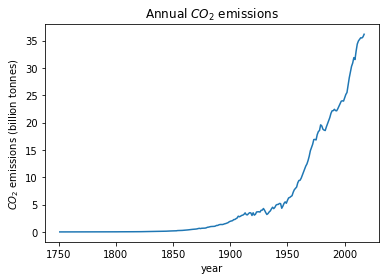

In [41]:
plt.plot(annual_co2_world.year, annual_co2_world.annual_co2_emis)
plt.xlabel("year")
plt.ylabel("$CO_2$ emissions (billion tonnes)")
plt.title("Annual $CO_2$ emissions")
plt.show()

In [42]:
annual_co2_world.annual_co2_emis.describe()

count    267.000000
mean       5.899791
std        9.395409
min        0.009351
25%        0.049537
50%        1.002430
75%        6.006269
max       36.153262
Name: annual_co2_emis, dtype: float64

We see that in quarter of period we were dumping 0.009 billion tons of $CO_2$ in atmosphere while in last quarter are are putting more then 6 billion tonnes on average. That's increase of almost million times. It's obvious we put more and more $CO_2$ in atmosphere each year. Let's see what is the contribution to these emissions by fuel types. Bellow he you see on map different countries annual $CO_2$ emissions. There is a missing data in the beginning for a lot of countries, but after 1900 year there is data for most countries and especially those with biggest emissions.

In [43]:
annual_co2_by_country = pd.read_csv("data/annual-co2-emissions-per-country.csv")
annual_co2_by_country = annual_co2_by_country.sort_values(['Year', 'Entity'], ascending=True)

In [44]:
px.choropleth(annual_co2_by_country, locations="Code", color= "Annual CO₂ emissions (tonnes)", hover_name="Entity", animation_frame="Year",
             color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

While watching the dynamic map, take in mind that color range on the right changes from 1 million to 35 billion.

Next dataset contains data for amount of $CO_2$ released in atmosphere by usage of cement, flaring, oil, coal, gas.

In [45]:
co2_by_source = pd.read_csv("data/CO2-by-source.csv")
co2_by_source.head()

Entity Code  Year  Cement (tonnes)  Flaring (tonnes)  Oil (tonnes)  \
0  Afghanistan  AFG  1949                0               0.0             0   
1  Afghanistan  AFG  1950                0               0.0         65952   
2  Afghanistan  AFG  1951                0               0.0         65952   
3  Afghanistan  AFG  1952                0               0.0         62288   
4  Afghanistan  AFG  1953                0               0.0         65952   

   Coal (tonnes)  Gas (tonnes)  
0          14656           0.0  
1          21984           0.0  
2          25648           0.0  
3          32976           0.0  
4          36640           0.0

In [46]:
co2_by_source_world = co2_by_source[co2_by_source["Entity"] == "World"].reset_index(drop=True)

In [47]:
co2_by_source_world.iloc[np.r_[0:4, -4:0]]

Entity      Code  Year  Cement (tonnes)  Flaring (tonnes)  Oil (tonnes)  \
0    World  OWID_WRL  1751                0               0.0             0   
1    World  OWID_WRL  1752                0               0.0             0   
2    World  OWID_WRL  1753                0               0.0             0   
3    World  OWID_WRL  1754                0               0.0             0   
263  World  OWID_WRL  2014       2081152000       249152000.0   12017920000   
264  World  OWID_WRL  2015       1440812834       249152000.0   12239725724   
265  World  OWID_WRL  2016       1463847305       249152000.0   12462777101   
266  World  OWID_WRL  2017       1477094561       249152000.0   12639227448   

     Coal (tonnes)  Gas (tonnes)  
0         10992000  0.000000e+00  
1         10992000  0.000000e+00  
2         10992000  0.000000e+00  
3         10992000  0.000000e+00  
263    15084688000  6.679472e+09  
264    14705196082  6.827860e+09  
265    14474942387  7.024381e+09  
266    14574317358  7.213470e+09

Let's remove first 2 columns and make data in billion of tons for better visualization.

In [48]:
co2_by_source_world = co2_by_source_world.drop(columns=["Entity", "Code"])

In [49]:
co2_by_source_world.columns = ["year", "cement", "flaring", "oil", "coal", "gas"]

In [50]:
co2_by_source_world.head()

year  cement  flaring  oil      coal  gas
0  1751       0      0.0    0  10992000  0.0
1  1752       0      0.0    0  10992000  0.0
2  1753       0      0.0    0  10992000  0.0
3  1754       0      0.0    0  10992000  0.0
4  1755       0      0.0    0  10992000  0.0

In [51]:
co2_by_source_world[np.array(co2_by_source_world.columns[1:])] = co2_by_source_world[np.array(co2_by_source_world.columns[1:])].apply( lambda x: x/10e8)

In [52]:
co2_by_source_world.iloc[np.r_[0:4, -4:0]]

year    cement   flaring        oil       coal       gas
0    1751  0.000000  0.000000   0.000000   0.010992  0.000000
1    1752  0.000000  0.000000   0.000000   0.010992  0.000000
2    1753  0.000000  0.000000   0.000000   0.010992  0.000000
3    1754  0.000000  0.000000   0.000000   0.010992  0.000000
263  2014  2.081152  0.249152  12.017920  15.084688  6.679472
264  2015  1.440813  0.249152  12.239726  14.705196  6.827860
265  2016  1.463847  0.249152  12.462777  14.474942  7.024381
266  2017  1.477095  0.249152  12.639227  14.574317  7.213470

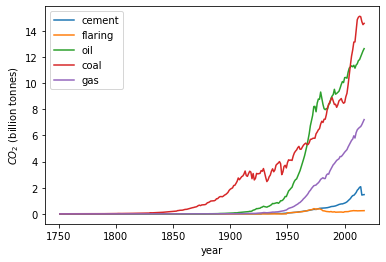

In [53]:
year = co2_by_source_world.year
material = co2_by_source_world.columns[1:]
for material in co2_by_source_world.columns[1:]:
    plt.plot(year, co2_by_source_world[material], label = material)
plt.xlabel("year")
plt.ylabel("$CO_2$ (billion tonnes)")
plt.legend()
plt.show()

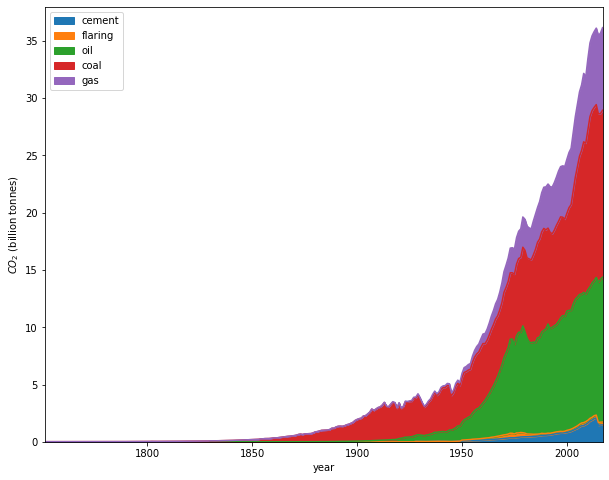

In [54]:
co2_by_source_world.plot.area(x="year", figsize = (10,8))
plt.ylabel("$CO_2$ (billion tonnes)")
plt.show()

Both graphs look good. Overall we see coal and oil have biggest effect of $CO_2$ emissions. Coal is mostly used for production of electricity and heat. Countries must reduce those plants using coal replace them with plans on gas or even plants using green energy or gas. About petrol usage, we see many car manufactures develop and sell more and more electricity cars, but oil is not used only in vehicles but in industry manufacturing for various everyday products.

In [55]:
co2_by_source_world.describe().T

count         mean        std          min          25%          50%  \
year     267.0  1884.000000  77.220464  1751.000000  1817.500000  1884.000000   
cement   267.0     0.167568   0.387492     0.000000     0.000000     0.000000   
flaring  267.0     0.053409   0.100672     0.000000     0.000000     0.000000   
oil      267.0     2.083904   3.752316     0.000000     0.000000     0.014656   
coal     267.0     2.777898   3.680451     0.010992     0.051296     0.992944   
gas      267.0     0.836673   1.731140     0.000000     0.000000     0.000000   

                 75%          max  
year     1950.500000  2017.000000  
cement      0.069616     2.081152  
flaring     0.086104     0.403040  
oil         1.652464    12.639227  
coal        4.045056    15.117664  
gas         0.388384     7.213470

Now let's look at world population. Why? Because growth of population means more fuel use, more meat needed to feed them. More meat mean more land needed to feed animals that we eat in the end. Land is also need for crops, cities, roads, factories and so. So we will look at deforestation also. 

In [56]:
world_population = pd.read_csv("data/world-population-by-world-regions-post-1820.csv")
world_population = world_population[world_population["Entity"] == "World"].reset_index()
world_population = world_population.drop(labels= "index", axis=1)

In [57]:
world_population.head()

Entity      Code   Year  Population by region
0  World  OWID_WRL -10000               2431214
1  World  OWID_WRL  -9000               3564407
2  World  OWID_WRL  -8000               5136461
3  World  OWID_WRL  -7000               7561695
4  World  OWID_WRL  -6000              11461003

In [58]:
world_population = world_population.drop(columns=["Entity", "Code"])

In [59]:
world_population.columns = ["year", "population"]

In [60]:
world_population.iloc[np.r_[0:4, -4:0]]

year   population
0   -10000      2431214
1    -9000      3564407
2    -8000      5136461
3    -7000      7561695
228   2097  10863179000
229   2098  10867894000
230   2099  10871811000
231   2100  10874902000

Let's make population in billions.

In [61]:
world_population.population = world_population.population / 10e8

In [62]:
world_population.year.unique()

array([-10000,  -9000,  -8000,  -7000,  -6000,  -5000,  -4000,  -3000,
        -2000,  -1000,      1,    100,    200,    300,    400,    500,
          600,    700,    800,    900,   1000,   1100,   1200,   1300,
         1400,   1500,   1600,   1700,   1750,   1800,   1850,   1900,
         1901,   1902,   1903,   1904,   1905,   1906,   1907,   1908,
         1909,   1910,   1911,   1912,   1913,   1914,   1915,   1916,
         1917,   1918,   1919,   1920,   1921,   1922,   1923,   1924,
         1925,   1926,   1927,   1928,   1929,   1930,   1931,   1932,
         1933,   1934,   1935,   1936,   1937,   1938,   1939,   1940,
         1941,   1942,   1943,   1944,   1945,   1946,   1947,   1948,
         1949,   1950,   1951,   1952,   1953,   1954,   1955,   1956,
         1957,   1958,   1959,   1960,   1961,   1962,   1963,   1964,
         1965,   1966,   1967,   1968,   1969,   1970,   1971,   1972,
         1973,   1974,   1975,   1976,   1977,   1978,   1979,   1980,
      

We see that we have usable data from year 1900 in order to use it it final dataset, so we have data for each year. Between year 1700 to 1900 we may approximation for each year population but later we will see if we need it. Let's plot population to see how it grows.

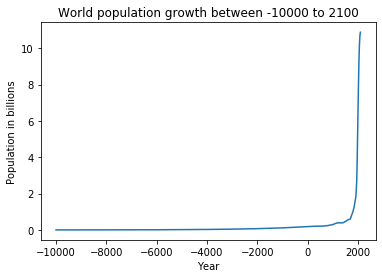

In [63]:
plt.plot(world_population.year, world_population.population)
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.title("World population growth between -10000 to 2100")
plt.show()

Obviously approximation is used for some of that data. Who knows when actual counting of people began like is done in modern days. Also data after 2019 is calculated. Let's filter years beween 1900 and 2019.

In [64]:
world_population_filtered = world_population[(world_population.year >= 1900) & ((world_population.year < 2020))]

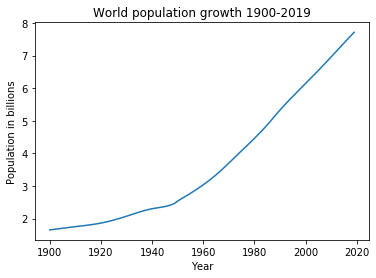

In [65]:
plt.plot(world_population_filtered.year, world_population_filtered.population)
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.title("World population growth 1900-2019")
plt.show()

In [66]:
world_population_filtered.describe().T

count        mean        std      min          25%          50%  \
year        120.0  1959.50000  34.785054  1900.00  1929.750000  1959.500000   
population  120.0     3.70636   1.893976     1.65     2.063745     3.007263   

                    75%          max  
year        1989.250000  2019.000000  
population     5.259889     7.713468

More people on the planet need more food and especially meat. Let's look and data for meat production.

In [67]:
meat_prod = pd.read_csv("data/meat-production-tonnes.csv")

In [68]:
meat_prod.head()

Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Livestock Primary: Meat, Total - Production - tonnes (FAO (2017)) (tonnes)  
0                                             129420                           
1                                             132206                           
2                                             138971                           
3                                             143830                           
4                                             150195

In [69]:
meat_world_prod = meat_prod[meat_prod["Entity"] == "World"].reset_index(drop=True)

In [70]:
meat_world_prod.head()

Entity      Code  Year  \
0  World  OWID_WRL  1961   
1  World  OWID_WRL  1962   
2  World  OWID_WRL  1963   
3  World  OWID_WRL  1964   
4  World  OWID_WRL  1965   

   Livestock Primary: Meat, Total - Production - tonnes (FAO (2017)) (tonnes)  
0                                           71362169                           
1                                           74654264                           
2                                           78830480                           
3                                           80414414                           
4                                           84465228

In [71]:
meat_world_prod = meat_world_prod.drop(columns=["Entity", "Code"])
meat_world_prod.columns = ["year", "meat_production"]

In [72]:
meat_world_prod.year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [73]:
meat_world_prod.iloc[np.r_[0:4, -4:0]]

year  meat_production
0   1961         71362169
1   1962         74654264
2   1963         78830480
3   1964         80414414
50  2011        297707428
51  2012        305671541
52  2013        312463459
53  2014        317854820

We have data for 1961 to 2014. Not perfect but not bad. We have fixed names and columns we need. Last let's make production in millions of tonnes.

In [74]:
meat_world_prod.meat_production = meat_world_prod.meat_production / 10e5

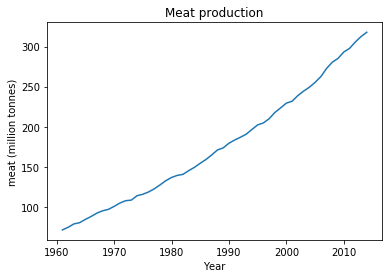

In [75]:
plt.plot(meat_world_prod.year, meat_world_prod.meat_production)
plt.xlabel("Year")
plt.ylabel("meat (million tonnes)")
plt.title("Meat production")
plt.show()

For the data that we have between 1961 and 2014 we see steady increase of meat production. GDP is not the only one, but a good indicator for economic growth and industrialization in the world.

In [76]:
world_gdp = pd.read_csv("data/world-gdp-over-the-last-two-millennia.csv")
world_gdp = world_gdp.drop(columns= ["Entity", "Code"])
world_gdp.columns= ["year", "gdp_in_dolars"]

In [77]:
 world_gdp.iloc[np.r_[0:10, -4:0]]

year  gdp_in_dolars
0      1   1.827410e+11
1   1000   2.101447e+11
2   1500   4.305273e+11
3   1600   5.744687e+11
4   1700   6.433229e+11
5   1820   1.202361e+12
6   1870   1.923917e+12
7   1900   3.418754e+12
8   1913   4.738676e+12
9   1940   7.806369e+12
72  2012   9.803230e+13
73  2013   1.012700e+14
74  2014   1.047200e+14
75  2015   1.081200e+14

We really can't do approximation for those missing years so we won't do it. Let's take data after 1900 year and calculate GDP in trillion dollars.  

In [78]:
world_gdp = world_gdp[world_gdp.year >=1900].reset_index(drop=True)

In [79]:
world_gdp.gdp_in_dolars = world_gdp.gdp_in_dolars / 10e11

In [80]:
 world_gdp.iloc[np.r_[0:4, -4:0]]

year  gdp_in_dolars
0   1900       3.418754
1   1913       4.738676
2   1940       7.806369
3   1950       9.251063
65  2012      98.032300
66  2013     101.270000
67  2014     104.720000
68  2015     108.120000

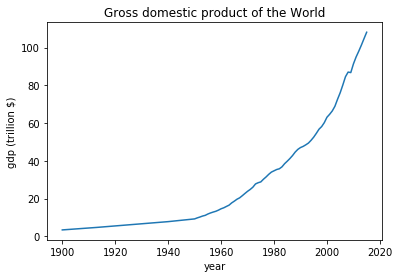

In [81]:
plt.plot(world_gdp.year, world_gdp.gdp_in_dolars)
plt.xlabel("year")
plt.ylabel("gdp (trillion $)")
plt.title("Gross domestic product of the World")
plt.show()

As expected GDP is steadily growing. If you notice there is decrease around 2008 year. Reason is 2008/2009 global economic crisis. Now let's take a look at our data for forests.

In [82]:
forests = pd.read_csv("data/forests_csv.csv")
forests.columns= ["Country", "Code", "year", "sq_km"]

In [83]:
forests.head()

Country Code  year     sq_km
0  Arab World  ARB  1990  501941.6
1  Arab World  ARB  1991  499629.0
2  Arab World  ARB  1992  497316.4
3  Arab World  ARB  1993  495003.8
4  Arab World  ARB  1994  492691.2

In [84]:
forests_world_area = forests[forests["Country"] == "World"].reset_index(drop=True)

In [85]:
forests_world_area.head()

Country Code  year       sq_km
0   World  WLD  1990  41282694.8
1   World  WLD  1991  41210027.6
2   World  WLD  1992  41137360.3
3   World  WLD  1993  41064693.1
4   World  WLD  1994  40992025.8

In [86]:
forests_world_area = forests_world_area.drop(columns= ["Country", "Code"])

In [87]:
forests_world_area.sq_km = forests_world_area.sq_km / 10e5

In [88]:
forests_world_area.iloc[np.r_[0:4, -4:0]]

year      sq_km
0   1990  41.282695
1   1991  41.210028
2   1992  41.137360
3   1993  41.064693
22  2012  40.090572
23  2013  40.057494
24  2014  40.024415
25  2015  39.991336

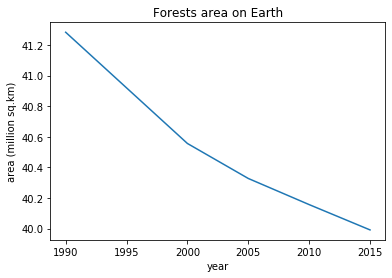

In [89]:
plt.plot(forests_world_area.year, forests_world_area.sq_km)
plt.xlabel("year")
plt.ylabel("area (million sq.km)")
plt.title("Forests area on Earth")
plt.show()

In [90]:
forests_world_area.describe().T

count         mean       std          min          25%          50%  \
year    26.0  2002.500000  7.648529  1990.000000  1996.250000  2002.500000   
sq_km   26.0    40.523838  0.396693    39.991336    40.199404    40.441725   

               75%          max  
year   2008.750000  2015.000000  
sq_km    40.828524    41.282695

We see that forests area is decreasing. Someone will say it's not by a lot. But we have data only for 15 years and after wall forests and plans are the only natural mechanism for Earth to reduce $CO_2$ in atmosphere. 

Now let's use data for air transport passengers carried in the world. Thanks to oil, road and air transport has helped to make the Earth smaller then ever. I trip that took 2 weeks by ship 100 years ago from West Europe to America, now takes 10 hours.

In [91]:
air_transport_passengers = pd.read_csv("data/number-of-air-transport-passengers-carried.csv")

In [92]:
air_transport_passengers_world = air_transport_passengers[air_transport_passengers["Entity"] == "World"].reset_index(drop=True)

In [93]:
air_transport_passengers_world.iloc[np.r_[0:4, -4:0]]

Entity      Code  Year  Air transport, passengers carried
0   World  OWID_WRL  1970                       3.104414e+08
1   World  OWID_WRL  1971                       3.316049e+08
2   World  OWID_WRL  1973                       4.015718e+08
3   World  OWID_WRL  1974                       4.211452e+08
43  World  OWID_WRL  2014                       3.227291e+09
44  World  OWID_WRL  2015                       3.466478e+09
45  World  OWID_WRL  2016                       3.705102e+09
46  World  OWID_WRL  2017                       3.978849e+09

In [94]:
air_transport_passengers_world = air_transport_passengers_world.drop(columns= ["Entity", "Code"])

In [95]:
air_transport_passengers_world.columns = ["year", "plane_passengers"]

In [96]:
air_transport_passengers_world.plane_passengers = air_transport_passengers_world.plane_passengers / 10e8

In [97]:
air_transport_passengers_world.iloc[np.r_[0:4, -4:0]]

year  plane_passengers
0   1970          0.310441
1   1971          0.331605
2   1973          0.401572
3   1974          0.421145
43  2014          3.227291
44  2015          3.466478
45  2016          3.705102
46  2017          3.978849

We have data for 1970-2017 years. We fixed columns and made number of passengers transported by plane in billions.

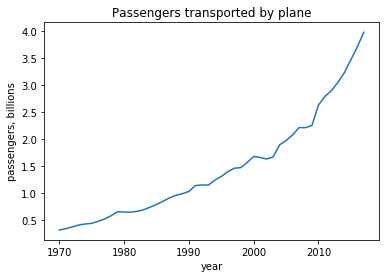

In [98]:
plt.plot(air_transport_passengers_world.year, air_transport_passengers_world.plane_passengers)
plt.xlabel("year")
plt.ylabel("passengers, billions")
plt.title("Passengers transported by plane")
plt.show()

We see a very steady increase in air transportation. I hope I covered most of the factors that increase $CO_2$ in atmosphere one way or another. Not let's try to combine them all with data for temperature and $CO_2$ levels in one table. We will use 1850 year for beginning.

In [99]:
all_data = pd.DataFrame(global_temps.year.unique(), columns=["YEAR"])

In [100]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR
0    1850
1    1851
2    1852
3    1853
166  2016
167  2017
168  2018
169  2019

In [101]:
all_data["mean_temp"] = mean_temp_world

In [102]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp
0    1850  -0.515333
1    1851  -0.389250
2    1852  -0.379417
3    1853  -0.403250
166  2016   0.973833
167  2017   0.859750
168  2018   0.794583
169  2019   0.930333

In [103]:
all_data["mean_temp_uncertainty"] = mean_temp_world_uncertainty

In [104]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp  mean_temp_uncertainty
0    1850  -0.515333               0.291500
1    1851  -0.389250               0.275917
2    1852  -0.379417               0.264917
3    1853  -0.403250               0.271083
166  2016   0.973833               0.057583
167  2017   0.859750               0.057833
168  2018   0.794583               0.056667
169  2019   0.930333               0.058333

We filtered co2_concentration_long_term data and took years after 1850 year.

In [105]:
co2_filtered = co2_concentration_long_term[co2_concentration_long_term.year >= 1850].reset_index(drop=True)

In [106]:
co2_filtered.iloc[np.r_[0:4, -4:0]]

year  co2_concentration_ppm
0    1850                287.058
1    1851                287.190
2    1852                287.263
3    1853                287.272
165  2015                398.205
166  2016                400.585
167  2017                402.982
168  2018                405.385

In [107]:
all_data = all_data.merge(co2_filtered,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [108]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm
0    1850  -0.515333               0.291500                287.058
1    1851  -0.389250               0.275917                287.190
2    1852  -0.379417               0.264917                287.263
3    1853  -0.403250               0.271083                287.272
166  2016   0.973833               0.057583                400.585
167  2017   0.859750               0.057833                402.982
168  2018   0.794583               0.056667                405.385
169  2019   0.930333               0.058333                    NaN

In [109]:
annual_co2_world_filtered = annual_co2_world[annual_co2_world.year >=1850].reset_index(drop=True)

In [110]:
annual_co2_world_filtered.iloc[np.r_[0:4, -4:0]]

year  annual_co2_emis
0    1850         0.196896
1    1851         0.198743
2    1852         0.207496
3    1853         0.217099
164  2014        35.505827
165  2015        35.462747
166  2016        35.675099
167  2017        36.153262

In [111]:
all_data = all_data.merge(annual_co2_world_filtered,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [112]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis  
0           0.196896  
1           0.198743  
2           0.207496  
3           0.217099  
166        35.675099  
167        36.153262  
168              NaN  
169              NaN

In [113]:
co2_by_source_world.iloc[np.r_[0:4, -4:0]]

year    cement   flaring        oil       coal       gas
0    1751  0.000000  0.000000   0.000000   0.010992  0.000000
1    1752  0.000000  0.000000   0.000000   0.010992  0.000000
2    1753  0.000000  0.000000   0.000000   0.010992  0.000000
3    1754  0.000000  0.000000   0.000000   0.010992  0.000000
263  2014  2.081152  0.249152  12.017920  15.084688  6.679472
264  2015  1.440813  0.249152  12.239726  14.705196  6.827860
265  2016  1.463847  0.249152  12.462777  14.474942  7.024381
266  2017  1.477095  0.249152  12.639227  14.574317  7.213470

In [114]:
co2_by_source_world_filtered = co2_by_source_world[co2_by_source_world.year >= 1850].reset_index(drop=True)

In [115]:
co2_by_source_world_filtered.iloc[np.r_[0:4, -4:0]]

year    cement   flaring        oil       coal       gas
0    1850  0.000000  0.000000   0.000000   0.197856  0.000000
1    1851  0.000000  0.000000   0.000000   0.197856  0.000000
2    1852  0.000000  0.000000   0.000000   0.208848  0.000000
3    1853  0.000000  0.000000   0.000000   0.216176  0.000000
164  2014  2.081152  0.249152  12.017920  15.084688  6.679472
165  2015  1.440813  0.249152  12.239726  14.705196  6.827860
166  2016  1.463847  0.249152  12.462777  14.474942  7.024381
167  2017  1.477095  0.249152  12.639227  14.574317  7.213470

In [116]:
all_data = all_data.merge(co2_by_source_world_filtered,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [117]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis    cement   flaring        oil       coal       gas  
0           0.196896  0.000000  0.000000   0.000000   0.197856  0.000000  
1           0.198743  0.000000  0.000000   0.000000   0.197856  0.000000  
2           0.207496  0.000000  0.000000   0.000000   0.208848  0.000000  
3           0.217099  0.000000  0.000000   0.000000   0.216176  0.000000  
166        35.675099  1.463847  0.249152  12.462777  14.474942  7.024381  
167        36.153262  1.477095  0.249152  12.639227  14.574317  7.213470  
168              NaN       NaN       NaN        NaN        NaN       NaN  
169              NaN       NaN       NaN        NaN        NaN       NaN

In [118]:
world_population.iloc[np.r_[29:39]]

year  population
29  1800    0.989818
30  1850    1.262682
31  1900    1.650000
32  1901    1.659948
33  1902    1.669997
34  1903    1.680115
35  1904    1.690269
36  1905    1.700426
37  1906    1.710551
38  1907    1.720607

Unfortunately we are missing data for years between 1850 to 1900. We will add the data by simple mean values and get needed years between 1850 and 2019.

In [119]:
world_population_filtered = world_population[(world_population.year <= 2019) & (world_population.year >= 1900) | (world_population.year == 1850)]

In [120]:
world_population_filtered.iloc[np.r_[0:4, -4:0]]

year  population
30   1850    1.262682
31   1900    1.650000
32   1901    1.659948
33   1902    1.669997
147  2016    7.464022
148  2017    7.547859
149  2018    7.631091
150  2019    7.713468

In [121]:
missing_years = 50
population_1900 = world_population_filtered[world_population_filtered.year == 1900]["population"].values
population_1850 = world_population_filtered[world_population_filtered.year == 1850]["population"].values
population_inc_for_year = ((population_1900 - population_1850) / missing_years)
population_inc_for_year

array([0.00774636])

In [122]:
years_list = []
popilation_list = []
for i in range(1,50):
    years_list.append(1850 + i)
    popilation_list.append((population_1850 + population_inc_for_year * i).item())  

In [123]:
missing_years_df = pd.DataFrame({"year": years_list, "population": popilation_list})

In [124]:
missing_years_df.iloc[np.r_[0:4, -4:0]]

year  population
0   1851    1.270428
1   1852    1.278175
2   1853    1.285921
3   1854    1.293668
45  1896    1.619015
46  1897    1.626761
47  1898    1.634507
48  1899    1.642254

In [125]:
world_population_filtered = world_population_filtered.append(missing_years_df).sort_values(by=["year"]).reset_index(drop=True)

In [126]:
world_population_filtered.iloc[np.r_[0:4, -4:0]]

year  population
0    1850    1.262682
1    1851    1.270428
2    1852    1.278175
3    1853    1.285921
166  2016    7.464022
167  2017    7.547859
168  2018    7.631091
169  2019    7.713468

In [127]:
all_data = all_data.merge(world_population_filtered,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [128]:
all_data.iloc[np.r_[0:4, -4:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis    cement   flaring        oil       coal       gas  \
0           0.196896  0.000000  0.000000   0.000000   0.197856  0.000000   
1           0.198743  0.000000  0.000000   0.000000   0.197856  0.000000   
2           0.207496  0.000000  0.000000   0.000000   0.208848  0.000000   
3           0.217099  0.000000  0.000000   0.000000   0.216176  0.000000   
166        35.675099  1.463847  0.249152  12.462777  14.474942  7.024381   
167        36.153262  1.477095  0.249152  12.639227  14.574317  7.213470   
168              NaN       NaN       NaN        NaN        NaN       NaN   
169              NaN       NaN       NaN        NaN        NaN       NaN   

     population  
0      1.262682  
1      1.270428  
2      1.278175  
3      1.285921  
166    7.464022  
167    7.547859  
168    7.631091  
169    7.713468

In [129]:
world_gdp.iloc[np.r_[0:4, -4:0]]

year  gdp_in_dolars
0   1900       3.418754
1   1913       4.738676
2   1940       7.806369
3   1950       9.251063
65  2012      98.032300
66  2013     101.270000
67  2014     104.720000
68  2015     108.120000

In [130]:
all_data = all_data.merge(world_gdp,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [131]:
all_data.iloc[np.r_[0:4, -10:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
160  2010   0.709417               0.053167                386.976   
161  2011   0.593417               0.054500                389.110   
162  2012   0.605750               0.055000                391.302   
163  2013   0.634167               0.056333                393.553   
164  2014   0.696250               0.057500                395.857   
165  2015   0.836417               0.055417                398.205   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis    cement   flaring        oil       coal       gas  \
0           0.196896  0.000000  0.000000   0.000000   0.197856  0.000000   
1           0.198743  0.000000  0.000000   0.000000   0.197856  0.000000   
2           0.207496  0.000000  0.000000   0.000000   0.208848  0.000000   
3           0.217099  0.000000  0.000000   0.000000   0.216176  0.000000   
160        33.066651  1.634144  0.245488  11.384048  13.967168  6.214144   
161        34.357366  1.810016  0.234496  11.482976  14.857520  6.433984   
162        34.919289  1.901616  0.238160  11.724800  15.044384  6.532912   
163        35.207886  2.029856  0.249152  11.798080  15.117664  6.617184   
164        35.505827  2.081152  0.249152  12.017920  15.084688  6.679472   
165        35.462747  1.440813  0.249152  12.239726  14.705196  6.827860   
166        35.675099  1.463847  0.249152  12.462777  14.474942  7.024381   
167        36.153262  1.477095  0.249152  12.639227  14.574317  7.213470   
168              NaN       NaN       NaN        NaN        NaN       NaN   
169              NaN       NaN       NaN        NaN        NaN       NaN   

     population  gdp_in_dolars  
0      1.262682            NaN  
1      1.270428            NaN  
2      1.278175            NaN  
3      1.285921            NaN  
160    6.956824        91.3297  
161    7.041194        94.9824  
162    7.125828        98.0323  
163    7.210582       101.2700  
164    7.295291       104.7200  
165    7.379797       108.1200  
166    7.464022            NaN  
167    7.547859            NaN  
168    7.631091            NaN  
169    7.713468            NaN

In [132]:
forests_world_area.iloc[np.r_[0:4, -4:0]]

year      sq_km
0   1990  41.282695
1   1991  41.210028
2   1992  41.137360
3   1993  41.064693
22  2012  40.090572
23  2013  40.057494
24  2014  40.024415
25  2015  39.991336

In [133]:
air_transport_passengers_world.head()

year  plane_passengers
0  1970          0.310441
1  1971          0.331605
2  1973          0.401572
3  1974          0.421145
4  1975          0.432277

Finally let's add remaining data for forests area and air transported passengers. I know it's for smaller interval of years but we have it so why not use it.

In [134]:
all_data = all_data.merge(forests_world_area,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [135]:
all_data.iloc[np.r_[0:4, -8:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
162  2012   0.605750               0.055000                391.302   
163  2013   0.634167               0.056333                393.553   
164  2014   0.696250               0.057500                395.857   
165  2015   0.836417               0.055417                398.205   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis    cement   flaring        oil       coal       gas  \
0           0.196896  0.000000  0.000000   0.000000   0.197856  0.000000   
1           0.198743  0.000000  0.000000   0.000000   0.197856  0.000000   
2           0.207496  0.000000  0.000000   0.000000   0.208848  0.000000   
3           0.217099  0.000000  0.000000   0.000000   0.216176  0.000000   
162        34.919289  1.901616  0.238160  11.724800  15.044384  6.532912   
163        35.207886  2.029856  0.249152  11.798080  15.117664  6.617184   
164        35.505827  2.081152  0.249152  12.017920  15.084688  6.679472   
165        35.462747  1.440813  0.249152  12.239726  14.705196  6.827860   
166        35.675099  1.463847  0.249152  12.462777  14.474942  7.024381   
167        36.153262  1.477095  0.249152  12.639227  14.574317  7.213470   
168              NaN       NaN       NaN        NaN        NaN       NaN   
169              NaN       NaN       NaN        NaN        NaN       NaN   

     population  gdp_in_dolars      sq_km  
0      1.262682            NaN        NaN  
1      1.270428            NaN        NaN  
2      1.278175            NaN        NaN  
3      1.285921            NaN        NaN  
162    7.125828        98.0323  40.090572  
163    7.210582       101.2700  40.057494  
164    7.295291       104.7200  40.024415  
165    7.379797       108.1200  39.991336  
166    7.464022            NaN        NaN  
167    7.547859            NaN        NaN  
168    7.631091            NaN        NaN  
169    7.713468            NaN        NaN

In [136]:
all_data = all_data.merge(air_transport_passengers_world,left_on="YEAR",right_on="year", how="outer").drop(columns = ["year"])

In [137]:
all_data.iloc[np.r_[0:4, -8:0]]

YEAR  mean_temp  mean_temp_uncertainty  co2_concentration_ppm  \
0    1850  -0.515333               0.291500                287.058   
1    1851  -0.389250               0.275917                287.190   
2    1852  -0.379417               0.264917                287.263   
3    1853  -0.403250               0.271083                287.272   
162  2012   0.605750               0.055000                391.302   
163  2013   0.634167               0.056333                393.553   
164  2014   0.696250               0.057500                395.857   
165  2015   0.836417               0.055417                398.205   
166  2016   0.973833               0.057583                400.585   
167  2017   0.859750               0.057833                402.982   
168  2018   0.794583               0.056667                405.385   
169  2019   0.930333               0.058333                    NaN   

     annual_co2_emis    cement   flaring        oil       coal       gas  \
0           0.196896  0.000000  0.000000   0.000000   0.197856  0.000000   
1           0.198743  0.000000  0.000000   0.000000   0.197856  0.000000   
2           0.207496  0.000000  0.000000   0.000000   0.208848  0.000000   
3           0.217099  0.000000  0.000000   0.000000   0.216176  0.000000   
162        34.919289  1.901616  0.238160  11.724800  15.044384  6.532912   
163        35.207886  2.029856  0.249152  11.798080  15.117664  6.617184   
164        35.505827  2.081152  0.249152  12.017920  15.084688  6.679472   
165        35.462747  1.440813  0.249152  12.239726  14.705196  6.827860   
166        35.675099  1.463847  0.249152  12.462777  14.474942  7.024381   
167        36.153262  1.477095  0.249152  12.639227  14.574317  7.213470   
168              NaN       NaN       NaN        NaN        NaN       NaN   
169              NaN       NaN       NaN        NaN        NaN       NaN   

     population  gdp_in_dolars      sq_km  plane_passengers  
0      1.262682            NaN        NaN               NaN  
1      1.270428            NaN        NaN               NaN  
2      1.278175            NaN        NaN               NaN  
3      1.285921            NaN        NaN               NaN  
162    7.125828        98.0323  40.090572          2.894055  
163    7.210582       101.2700  40.057494          3.048275  
164    7.295291       104.7200  40.024415          3.227291  
165    7.379797       108.1200  39.991336          3.466478  
166    7.464022            NaN        NaN          3.705102  
167    7.547859            NaN        NaN          3.978849  
168    7.631091            NaN        NaN               NaN  
169    7.713468            NaN        NaN               NaN

Finally! After a lot of hard work we managed to combine data from 9 datasets into 1. That's pretty impressive. But let's explain how we did it. First we made first column for years on purpose to be with capital letters so it's not the same as columns in other datasets that we merged with the starting add_data dataset. If we left it with small letter df.merge function will give us error, because it wants **left_on** and **right_on** parameters to be different. Also we used **drop(columns = ["year"]** at the end, because **merge** added another column for year when we have already year in first column. Merge also added **NaN** values in place where we did,t have data for given year. So this was the method for all columns except first 2. They were easier, because they have same length like initial dataset so we just created column in **add_data** dataset. 

We did some changes on the data from initial 9 dataset and we end up with one completely new dataset. It won't be bad to explain data in each column so you know what stands behind each number in each column. Let's do it.

YEAR - Year between 1850-2019.

mean_temp - Mean global surface temperature . We calculated it by taking mean from 12 months data for each year.

mean_temp_uncertainty - Same as mean_temp except it shows what uncertainty we have for mean_temp.

co2_concentration_ppm - $CO_2$ concentration in atmosphere in parts per million.

annual_co2_emis - Annual $CO_2$ emission in atmosphere in billion tonnes.

cement, flaring, oil, coal, gas - Amount of $CO_2$ released in atmosphere by usage of cement, flaring, oil, coal, gas in billion tonnes.

population - Earth population in billions. Population for 1851-1899 calculated with approximation from data for population for 1850 and 1900.

gdp_in_dolars - Gross domestic product of all countries. GDP is calculated in today dollars. Values in this column are in trillion $.

sq_km - Area of forests where trees are above 5 meters in million sq.km.

plane_passengers - Passengers transported by plane in billions.

In [138]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 14 columns):
YEAR                     170 non-null int64
mean_temp                170 non-null float64
mean_temp_uncertainty    170 non-null float64
co2_concentration_ppm    169 non-null float64
annual_co2_emis          168 non-null float64
cement                   168 non-null float64
flaring                  168 non-null float64
oil                      168 non-null float64
coal                     168 non-null float64
gas                      168 non-null float64
population               170 non-null float64
gdp_in_dolars            69 non-null float64
sq_km                    26 non-null float64
plane_passengers         47 non-null float64
dtypes: float64(13), int64(1)
memory usage: 19.9 KB


In [139]:
all_data.describe().T

count         mean        std          min  \
YEAR                   170.0  1934.500000  49.218899  1850.000000   
mean_temp              170.0    -0.062093   0.366538    -0.644500   
mean_temp_uncertainty  170.0     0.127890   0.067456     0.045833   
co2_concentration_ppm  169.0   317.474136  31.441900   286.104000   
annual_co2_emis        168.0     9.349352  10.407585     0.196896   
cement                 168.0     0.266314   0.461201     0.000000   
flaring                168.0     0.084883   0.115997     0.000000   
oil                    168.0     3.311918   4.281961     0.000000   
coal                   168.0     4.387525   3.813827     0.197856   
gas                    168.0     1.329713   2.028274     0.000000   
population             170.0     3.043451   1.894855     1.262682   
gdp_in_dolars           69.0    41.639770  28.247242     3.418754   
sq_km                   26.0    40.523838   0.396693    39.991336   
plane_passengers        47.0     1.483855   0.971672     0.310441   

                               25%          50%          75%          max  
YEAR                   1892.250000  1934.500000  1976.750000  2019.000000  
mean_temp                -0.357958    -0.140542     0.104500     0.973833  
mean_temp_uncertainty     0.061500     0.129667     0.154083     0.291500  
co2_concentration_ppm   293.591000   308.257000   331.195000   405.385000  
annual_co2_emis           1.358009     3.984250    17.142927    36.153262  
cement                    0.000000     0.031144     0.358156     2.081152  
flaring                   0.000000     0.000000     0.168544     0.403040  
oil                       0.032976     0.589904     8.018664    12.639227  
coal                      1.317208     3.242640     6.163764    15.117664  
gas                       0.007328     0.102592     2.236872     7.213470  
population                1.589966     2.184897     4.210796     7.713468  
gdp_in_dolars            17.727427    35.407765    58.159500   108.120000  
sq_km                    40.199404    40.441725    40.828524    41.282695  
plane_passengers          0.669792     1.233233     2.021002     3.978849

In [140]:
all_data.corr()

YEAR  mean_temp  mean_temp_uncertainty  \
YEAR                   1.000000   0.882088              -0.940448   
mean_temp              0.882088   1.000000              -0.731046   
mean_temp_uncertainty -0.940448  -0.731046               1.000000   
co2_concentration_ppm  0.915698   0.935745              -0.781605   
annual_co2_emis        0.900199   0.913151              -0.772015   
cement                 0.759971   0.858779              -0.601403   
flaring                0.776874   0.679008              -0.720638   
oil                    0.885708   0.883679              -0.764527   
coal                   0.922133   0.916628              -0.805281   
gas                    0.827410   0.896561              -0.678335   
population             0.911785   0.931319              -0.777270   
gdp_in_dolars          0.908834   0.915690              -0.652594   
sq_km                 -0.985018  -0.852614               0.171835   
plane_passengers       0.950027   0.911820              -0.216366   

                       co2_concentration_ppm  annual_co2_emis    cement  \
YEAR                                0.915698         0.900199  0.759971   
mean_temp                           0.935745         0.913151  0.858779   
mean_temp_uncertainty              -0.781605        -0.772015 -0.601403   
co2_concentration_ppm               1.000000         0.988398  0.941097   
annual_co2_emis                     0.988398         1.000000  0.942518   
cement                              0.941097         0.942518  1.000000   
flaring                             0.732162         0.805441  0.660565   
oil                                 0.955862         0.984929  0.890692   
coal                                0.988443         0.981364  0.941680   
gas                                 0.977062         0.985473  0.966414   
population                          0.992540         0.995727  0.931857   
gdp_in_dolars                       0.991320         0.976787  0.977017   
sq_km                              -0.971261        -0.929129 -0.893358   
plane_passengers                    0.972868         0.978886  0.930533   

                        flaring       oil      coal       gas  population  \
YEAR                   0.776874  0.885708  0.922133  0.827410    0.911785   
mean_temp              0.679008  0.883679  0.916628  0.896561    0.931319   
mean_temp_uncertainty -0.720638 -0.764527 -0.805281 -0.678335   -0.777270   
co2_concentration_ppm  0.732162  0.955862  0.988443  0.977062    0.992540   
annual_co2_emis        0.805441  0.984929  0.981364  0.985473    0.995727   
cement                 0.660565  0.890692  0.941680  0.966414    0.931857   
flaring                1.000000  0.861031  0.748309  0.731073    0.776707   
oil                    0.861031  1.000000  0.938049  0.963972    0.981323   
coal                   0.748309  0.938049  1.000000  0.957702    0.976481   
gas                    0.731073  0.963972  0.957702  1.000000    0.983898   
population             0.776707  0.981323  0.976481  0.983898    1.000000   
gdp_in_dolars          0.235482  0.890376  0.985164  0.987916    0.972695   
sq_km                 -0.880496 -0.973209 -0.873928 -0.960472   -0.983741   
plane_passengers      -0.203274  0.947648  0.959765  0.973290    0.950359   

                       gdp_in_dolars     sq_km  plane_passengers  
YEAR                        0.908834 -0.985018          0.950027  
mean_temp                   0.915690 -0.852614          0.911820  
mean_temp_uncertainty      -0.652594  0.171835         -0.216366  
co2_concentration_ppm       0.991320 -0.971261          0.972868  
annual_co2_emis             0.976787 -0.929129          0.978886  
cement                      0.977017 -0.893358          0.930533  
flaring                     0.235482 -0.880496         -0.203274  
oil                         0.890376 -0.973209          0.947648  
coal                        0.985164 -0.873928          0.959765  
gas                         0.987916 -0

Correlation between features speaks for itself. It's even better if we use colours to visualize it.

In [141]:
corr_all_data = all_data.corr()
corr_all_data.style.background_gradient(cmap='coolwarm')

In [142]:
corr_all_data_sorted = corr_all_data.unstack().sort_values(ascending = False).drop_duplicates()

In [143]:
corr_all_data_sorted[:10]

plane_passengers       plane_passengers         1.000000
annual_co2_emis        population               0.995727
plane_passengers       gdp_in_dolars            0.994523
population             co2_concentration_ppm    0.992540
co2_concentration_ppm  gdp_in_dolars            0.991320
coal                   co2_concentration_ppm    0.988443
annual_co2_emis        co2_concentration_ppm    0.988398
gdp_in_dolars          gas                      0.987916
gas                    annual_co2_emis          0.985473
gdp_in_dolars          coal                     0.985164
dtype: float64

And it's even better if we filter all values and get top 10.

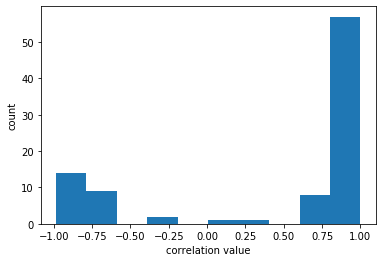

In [144]:
plt.hist(corr_all_data_sorted)
plt.xlabel("correlation value")
plt.ylabel("count")
plt.show()

Everything so far tells us how big is the connection in the data we collected. Finally let's plot temperature and $CO_2$ concentration in atmosphere.

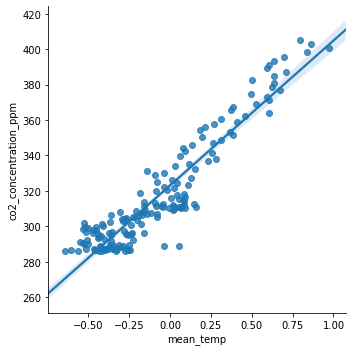

In [145]:
sns.lmplot(x="mean_temp", y="co2_concentration_ppm", data =all_data)
plt.show()

What we did so far. We collected a lot of data. We find useful part of it and combined it in one single dataset. We showed that all features in it have connection between each other. Main relation is between Earth temperature and $CO_2$ concentration in atmosphere.

### Conclusion
Take in mind one important thing. People often mistake climate and weather. I will explain it simple the same way I heard it by Neil deGrasse Tyson on "Startalk". Climate is a person's character and weather is person's mood. Climate is very complicated variable. Many factors after it. How we can be sure human activity is causing global rise in temperatures? We showed our data and showed trend and relations between different variables in it. Let's talk about the story numbers tell is. 

We are sure global temperatures are rising, as well as $CO_2$ concentration in atmosphere. We know Earth hasn't seen such fast increase in $CO_2$ levels in last 800 000 years. Also we know how much $CO_2$ we dump in the air we breath by burning fossil fuels. We do it because we know to drive our cars, take vacation 10000 km from home and get their in 16 hours by plane, have heat in our homes during winter and air conditioning in summer and many other smaller thing. Oil is used to make many everyday products and most of them end up in landfill or even worst in our rivers and oceans. Too bad those product take hundreds of years or more to dissolve. One more thing I read in article a few days ago is that weight of plastic in oceans now, is almost the same as weight of marine life. We are people. We like to have everything on the tip of our hands at the moment. We don't think what will happen tomorrow, in 10 or 50 years. But we have obligation for the planet we live on, for people around us, for our children. If you ask families what they want for their children, most will answer "We want them to live better life then us". This won't happen if we continue to deny Global Warming. One more import point is that climate as I said, is influence by many variable which we still don't understand completely. Even if we stop using fossil fuels today and each person on Earth becomes carbon neutral, temperatures will continue to rise. To what point climatologies are still figuring that out. Problem is that higher temperatures lead to faster Global Warming. How? Ice and clouds mainly reflect sun light back in space, preventing Earth from overheating. Higher temperature lead to melting ice caps and this means more dark area on Earth that absorbs sun light instead of reflecting it. I can talk a lot about many other causes of human activity but I hope that was enough to convince you that Global warming is real and we need to take decisive actions. If we don't change our lifestyle and habits we won't kill the Earth. We will make many animals, fish, insects and plants extinct by this won't be the first mass extinction on planet. There have been already 5 mass extinctions on Earth. I'm sure planet will recover even if we burn all fossil fuels we can find and if we pollute all water and land. We are almost 8 billion people on Earth and this is our only home for time being. Please think about that. If we all do small thing in our everyday life to help reduce $CO_2$ emission and pollution, we will live a happier and healthier lives.

### Future work

We can collect data for consequences of Global Warming. Like number and power of hurricanes, area of ice caps, Coral Die-off, changes in droughts and rainfall. Basically how extreme weather events have increased. See how that data relates to data we have already collected. Also make model based on that data to predict global temperatures and extreme weather events in the future.

### References:
https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming/data

https://ourworldindata.org/meat-and-seafood-production-consumption

https://ourworldindata.org/economic-growth

https://ourworldindata.org/forests

https://medium.com/@stro1135/global-warming-a-hoax-can-data-decide-cfd54b902b6a

https://skepticalscience.com/Global-Warming-Effects.html

https://www.nationalgeographic.com/environment/global-warming/global-warming-effects/